In [3]:
import pandas as pd
import requests

<AxesSubplot:xlabel='datetime'>

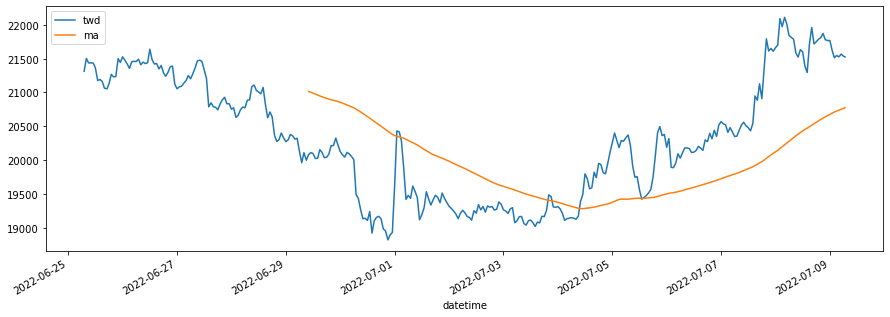

In [8]:
def get_price(url):
    res = requests.get(url)
    data_prices = res.json()["stats"]
    
    df = pd.DataFrame(data_prices)
    df.columns = ['datetime', 'twd']
    df['datetime'] = pd.to_datetime(df['datetime'], unit='ms')
    
    df.index = df['datetime']
    
    return df
    
url = "https://www.coingecko.com/price_charts/1/usd/14_days.json"

bitcoin = get_price(url)


bitcoin["ma"] = bitcoin['twd'].rolling(window=100).mean()

bitcoin[['twd', 'ma']].plot(kind="line", figsize=[15,5])


In [9]:
def strategy(df, total, ma_num, stop_earn):
    df['ma'] =ma["twd"].rolling(window=ma_num).mean()
    df = df[ma_num-1 : ]
    entry_price = 0
    max_price = 0
    min_price = 0
    state = "wait_long"
    
    for i in range(len(df)):
        if state == "wait_long":
            if df['twd'][i] > df['ma'][i]:
                min_price = df['twd'][i]
                entry_price = df['twd'][i]
                state = "entry_long"
        elif state == "wait_short":
            if df['twd'][i] < df["ma"][i]:
                min_price = df['twd'][i]
                entry_price = df['twd'][i]
                state = "entry_short"
        elif state == "entry_long":
            if df['twd'][i] > max_price:
                max_price = df['twd'][i]
            if df['twd'][i] < max_price:
                total += df['twd'][i] - entry_price
                state = "wait_short"
            elif df['twd'][i] - entry_price > stop_earn and stop_earn != 0:
                total += df['twd'][i] - entry_price
                state = "wait_short"
        elif state == "entry_short":
            if df['twd'][i] < min_price:
                min_price = df['twd'][i]
            if df['twd'][i] > min_price:
                total += entry_price - df['twd'][i]
                state == "wait_long"
            elif entry_price - df['twd'][i] > stop_earn and stop_earn != 0:
                total += entry_price - df['twd'][i]
                state == "wait_long"
    return total
                
            
                
        